# Nearest Neighbor item based Collaborative Filtering

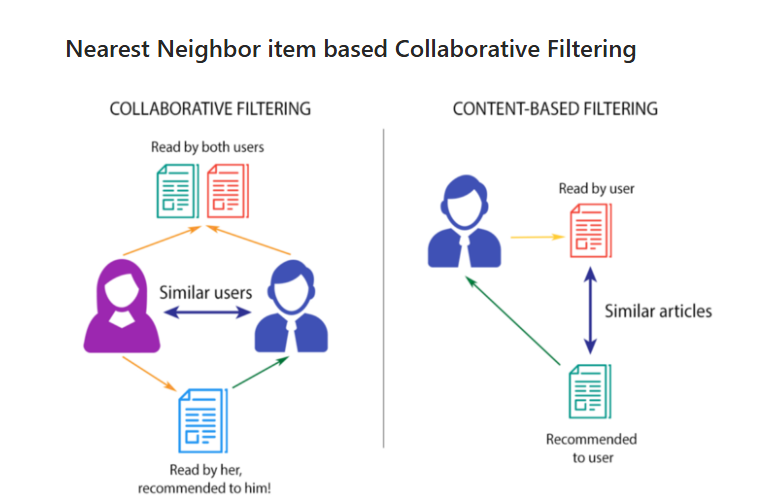

In [1]:
##Dataset url: https://grouplens.org/datasets/movielens/latest/

import pandas as pd
import numpy as np

In [4]:
movies_df = pd.read_csv(r'\\EDPC1\Common\Datasets\movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv(r'\\EDPC1\Common\Datasets\ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [5]:
movies_df = pd.read_csv(r'\\EDPC1\Common\Datasets\movies.csv', usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})

In [6]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [11]:
df = pd.merge(rating_df,movies_df,on='movieId')
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [9]:
combine_movie_rating = df.dropna(axis=0, subset=['title'])

In [10]:
combine_movie_rating

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)
...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997)
100832,610,160527,4.5,Sympathy for the Underdog (1971)
100833,610,160836,3.0,Hazard (2005)
100834,610,163937,3.5,Blair Witch (2016)


In [18]:
# how many ratings does each movie have
movie_rating_count = combine_movie_rating.groupby('title').count()['rating'].reset_index().rename(columns={'rating':'totalRatingCount'})
movie_rating_count.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [21]:
# merge the ratingcount with df dataframe to append the data for total ratings per movie
rating_with_totalRatingCount = combine_movie_rating.merge(movie_rating_count, on='title')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [25]:
print(movie_rating_count['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_rating_count['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [26]:
popularity_threshold = 50
rating_popular_movie = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [27]:
rating_popular_movie.shape

(41362, 5)

### Pivot Table

Let's create a Pivot Table

##### Attempt

In [30]:
rating_popular_movie.groupby(['userId', 'title']).mean().reset_index()

,userId,title,movieId,rating,totalRatingCount
0,1,"Abyss, The (1989)",1127.000,4.000,62.000
1,1,Alien (1979),1214.000,4.000,146.000
2,1,American Beauty (1999),2858.000,5.000,204.000
3,1,American History X (1998),2329.000,5.000,129.000
4,1,Apocalypse Now (1979),1208.000,4.000,107.000
...,...,...,...,...,...
41355,610,X-Men (2000),3793.000,3.500,133.000
41356,610,X-Men: The Last Stand (2006),45499.000,3.000,52.000
41357,610,X2: X-Men United (2003),6333.000,4.000,76.000
41358,610,Zombieland (2009),71535.000,3.500,53.000


In [31]:
rating_popular_movie.groupby(['userId', 'title']).mean().reset_index().pivot(index='userId', columns='title', values='rating')

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000,NaN,NaN,...,5.000,5.000,NaN,5.000,NaN,NaN,NaN,5.000,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000,NaN,NaN,NaN,NaN,NaN,3.000,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500,NaN,NaN,NaN
4,NaN,5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000,5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,5.000,NaN,NaN,NaN,3.500,NaN,NaN,2.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.500,3.500,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000,NaN,3.000,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,3.000,3.500,5.000,NaN,4.500,3.000,3.500,2.000,...,3.500,2.500,NaN,4.000,4.000,4.000,NaN,NaN,NaN,3.000


##### Correct approach

In [35]:
movie_features_df = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


##### Comparing the values from the pivot tables with the csr_matrix
###### pivot table values

In [36]:
movie_features_df.values

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 3. , 0. , 4.5],
       ...,
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 3.5],
       [0. , 0. , 0. , ..., 3. , 0. , 4. ]], dtype=float32)

###### csr_matrix

In [39]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)
movie_features_df_matrix

<450x606 sparse matrix of type '<class 'numpy.float32'>'
	with 41360 stored elements in Compressed Sparse Row format>

scipy.sparse and its submodules provide tools for working with sparse arrays. Sparse arrays are arrays where only a few locations in the array have any data, most of the locations are considered as “empty”. Sparse arrays are useful because they allow for simpler, faster, and/or less memory-intensive algorithms for linear algebra (scipy.sparse.linalg) or graph-based computations (scipy.sparse.csgraph), but they are generally less flexible for operations like slicing, reshaping, or assignment. 

In [40]:
from sklearn.neighbors import NearestNeighbors # different from KNearestNeighbors Classifier or Regressor. NearestNeighbors is unsupervised

model_nn = NearestNeighbors(metric='cosine', algorithm='brute')
model_nn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [41]:
movie_features_df.shape

(450, 606)

In [42]:
movie_features_df.shape[0]

450

In [52]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

380


In [54]:
movie_features_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X2: X-Men United (2003),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,4.000
You've Got Mail (1998),0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000
Young Frankenstein (1974),5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,3.500,0.000,0.000,0.000,0.000


In [55]:
# select row of index query_index
movie_features_df.iloc[query_index,:]

userId
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
       ... 
606   0.000
607   0.000
608   3.000
609   3.000
610   0.000
Name: Star Trek: Generations (1994), Length: 606, dtype: float32

In [56]:
# reshape it for the model
movie_features_df.iloc[query_index,:].values

array([0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 4. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. , 3. , 0. ,
       3. , 0. , 0. , 5. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       3. , 0. , 3. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. ,
       5. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
       0. , 3. , 0. , 2. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 3. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 3. , 0. ,
       0. , 0. , 0. , 2. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       3. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 4. , 3. , 5. , 0. , 0. , 3. , 0. , 0. , 0. , 0.

In [57]:
movie_features_df.iloc[query_index,:].values.reshape(1, -1)

array([[0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 4. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 3. , 3. , 0. ,
        3. , 0. , 0. , 5. , 0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        3. , 0. , 3. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. ,
        5. , 4. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
        0. , 3. , 0. , 2. , 0. , 0. , 2.5, 0. , 0. , 0. , 0. , 3. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 3. , 0. ,
        0. , 0. , 0. , 2. , 2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        3. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 4. , 3. , 5. , 0. , 0. , 3. , 0. 

In [58]:
# find the 6 neighbor closest to query_index, including query_index
distances, indices = model_nn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)

In [59]:
distances

array([[3.5762787e-07, 3.8533086e-01, 4.4057512e-01, 4.4989467e-01,
        4.5130956e-01, 4.5168650e-01]], dtype=float32)

In [60]:
indices

array([[380, 387,  97,  43,  45, 415]], dtype=int64)

In [61]:
distances.flatten()

array([3.5762787e-07, 3.8533086e-01, 4.4057512e-01, 4.4989467e-01,
       4.5130956e-01, 4.5168650e-01], dtype=float32)

In [63]:
indices.flatten()

array([380, 387,  97,  43,  45, 415], dtype=int64)

In [64]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Star Trek: Generations (1994):

1: Stargate (1994), with distance of 0.38533085584640503:
2: Clear and Present Danger (1994), with distance of 0.44057512283325195:
3: Batman (1989), with distance of 0.44989466667175293:
4: Batman Forever (1995), with distance of 0.45130956172943115:
5: True Lies (1994), with distance of 0.4516865015029907:


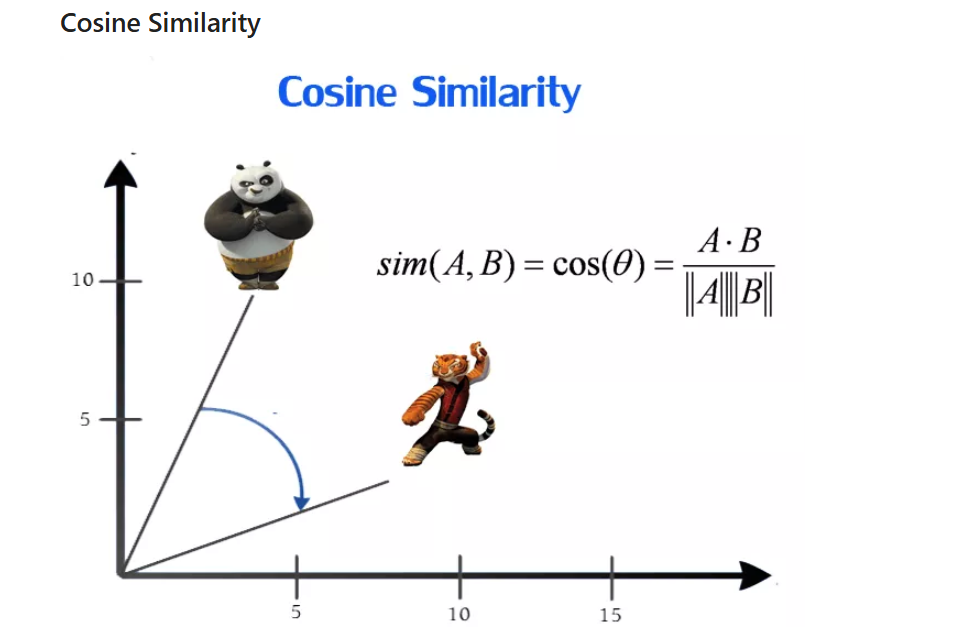